<a href="https://colab.research.google.com/github/Z3376/BT-estimate/blob/master/BT_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [1]:
!pip install efficientnet
import keras
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from keras.preprocessing import image
import seaborn as sns
import pandas as pd
from scipy import stats
import random
import tensorflow as tf
import efficientnet.keras as efn 
from astropy.io import fits
# import sqlcl

Using TensorFlow backend.


# Data

In [0]:
im_size = 128

In [0]:
def get_model(pool='avg'):
    inpt = keras.layers.Input((im_size,im_size,3))
    if(pool=='avg'):
        base_model = keras.applications.Xception(weights=None,include_top=False,pooling='avg')
        x = base_model(inpt)
    elif(pool=='max'):
        base_model = keras.applications.Xception(input_tensor=inpt,weights=None,include_top=False,pooling='max')
        x = base_model.output
    # fc = keras.layers.Flatten()(x)

    # _,h,w,d = x.shape.as_list()

    # att = keras.layers.Dense(1,activation='tanh',name='att1')(x)
    # att = keras.layers.Flatten(name='att2')(att)
    # att = keras.layers.Dense(h*w,activation='softmax',name='att3')(att)

    # # att_out = keras.layers.Reshape((8,8))(att)
    # # att_out = keras.layers.Lambda(lambda x: tf.tile(x,[1,8,8]))(att_out)
    # # attention = keras.models.Model(inpt,att_out)

    # att = keras.layers.Lambda(lambda x: tf.tile(x,[1,d]),name='att4')(att)
    # att_fc = keras.layers.Multiply(name='att5')([fc,att])
    out = keras.layers.Dense(1,activation='sigmoid')(x)
    model = keras.models.Model(inpt,out)
    return model

In [0]:
inpt = keras.layers.Input((im_size,im_size,3))
base_model = keras.applications.Xception(input_tensor=inpt,weights=None,include_top=False,pooling='max')
x = base_model.output
out = keras.layers.Dense(1,activation='sigmoid')(x)
inf_model = keras.models.Model(inpt,out)

inf_model.load_weights('./gdrive/My Drive/accnt.3/bt_cnn_dr7_notransfer.h5')

In [0]:
# def get_model(im_size=128):
#     base_model = keras.applications.Xception(weights=None,include_top=False,pooling='max')
#     inpt = keras.layers.Input((im_size,im_size,3))
#     inpt1 = keras.layers.Input((im_size,im_size,3))
#     inpt2 = keras.layers.Input((im_size,im_size,3))
#     conc = keras.layers.Concatenate(axis=-1)([inpt,inpt1,inpt2])
#     conc = keras.layers.SeparableConv2D(3,(1,1),activation='softmax',depthwise_initializer='he_normal',pointwise_initializer='he_normal')(conc)
#     conc = keras.layers.BatchNormalization()(conc)
#     x = base_model(conc)

#     out = keras.layers.Dense(1,activation='sigmoid')(x)
#     model3 = keras.models.Model([inpt,inpt1,inpt2],out)
#     # model3 = keras.models.Model(inpt,out)

#     return model3

In [55]:
inf_model1 = get_model()
inf_model2 = get_model(pool='max')
# inf_model3 = model
inf_model1.load_weights('./gdrive/My Drive/accnt.2/bt_cnn(gap)_cp.h5')
inf_model2.load_weights('./gdrive/My Drive/accnt.1/bt_cnn(xception)_cp(mae_nofcn).h5')
# inf_model3.load_weights('./gdrive/My Drive/accnt.2/bt_cnn(att)_cp.h5')

In [0]:
# inf_model.summary()

In [0]:
# !rm -rf ./img/

In [0]:
if(not(os.path.isdir('./img'))):
    !unzip './gdrive/My Drive/img_highres.zip'

In [0]:
with fits.open('./gdrive/My Drive/Meert_rBT_two_component.fits') as hdul:
    data = hdul[1].data

In [0]:
# test_folder_path = './gdrive/My Drive/Thesis/BT/img'
test_folder_path = './img'

p = subprocess.Popen(['ls',test_folder_path],stdout=subprocess.PIPE)
ls = str(p.communicate()[0],'utf-8').split('.jpg\n')[:-1]
ls = ls[-5000:]

In [197]:
print(ls[0])
print(ls[-1])

95501_RA_226.109_DEC_35.0809_Rad_14.31_rTot_1.79_C_2.99_BT_0.43
9_RA_237.974_DEC_-0.06485389_Rad_12.89_rTot_1.82_C_2.73_BT_0.61


In [0]:
# ## Use only with img_test_set
# i = 0
# rem = ['197758']
# while(i<len(ls)):
#     if(ls[i].split('_')[0] in rem):
#         ls.pop(i)
#         break
# #         i-=1
#     i+=1

In [0]:
i = 0
while(i<len(ls)):
    if(ls[i][-1]==')'):
        ls.pop(i)
        i-=1
    elif(os.path.getsize(test_folder_path+'/'+ls[i]+'.jpg')==0):
        ls.pop(i)
        i-=1 
    i+=1

In [0]:
def bt(im_name):
    return float(im_name.split('_')[-1])

In [0]:
def id(im_name):
    return int(im_name.split('_')[0])

In [0]:
def rtot(im_name):
    return float(im_name.split('_')[-5])

In [0]:
# ind = 19
# lines = sqlcl.query('select petroRad_r from galaxy where objID='+str(data['objID'][id(ls[ind])])).readlines()
# print(float(lines[1].strip()))

In [0]:
# petro_rad  = []
# for i in tqdm(range(len(ls))):
#     objID = str(data['objID'][id(ls[i])])
#     try:
#         lines = sqlcl.query('select petroRad_r from galaxy where objID='+objID).readlines()
#         petro_rad.append([int(objID),float(lines[1].strip())])
#     except:
#         print(i)

In [0]:
# objID = []
# rem = [658,967,1017,1026,1371,1402,1665,2776,3887,4998]
# for i in range(len(ls)):
#     if(i not in rem):
#         objID.append(int(data['objID'][id(ls[i])]))
# objID = tuple(objID)

In [0]:
# lines = sqlcl.query('select top 2 objID,petroRad_r from galaxy').readlines()
# print(list(map(float,lines[1].strip().split(b','))))

In [0]:
# lines = sqlcl.query('select objID,petroRad_r from galaxy where objID in '+str(objID)).readlines()

In [0]:
petro_df = pd.read_csv('./gdrive/My Drive/two_component_petroRad.csv')

In [0]:
ln = len(ls)
label = [[ls[i]+'.jpg',bt(ls[i]),data['mag'][id(ls[i])],data['objID'][id(ls[i])]] for i in range(ln)]

In [0]:
label_df = pd.DataFrame(label)
label_df.columns = ['id','bt','mag','objID']

In [0]:
label_df = pd.merge(label_df,petro_df,on='objID')

In [0]:
# label_df = label_df[label_df.mag<17].reset_index(drop=True)

# Distribution

In [0]:
obj = pd.DataFrame(data['objID'])
obj.columns = ['objID']

In [0]:
obj.to_csv('objid.csv',header='objID',index=False)

In [36]:
print(min(data['mag']))
print(max(data['mag']))

13.136
19.163


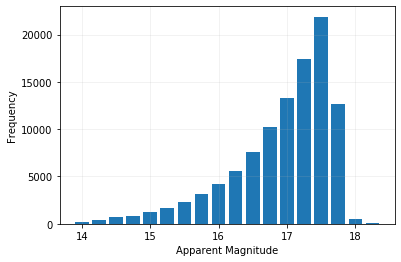

In [19]:
ln = 18
mn = 14
dist = [0 for i in range(ln)]
for i in range(len(data)):
    ind = int((data['mag'][i]-mn)*4)
    if(ind<ln):
        dist[ind]+=1
fig = plt.figure()
plt.grid(alpha=0.2)
plt.bar([mn+(0.25*i) for i in range(ln)],dist,width=0.2)

# dist = [0 for i in range(42)]
# for i in range(len(label_df)):
#     dist[int(label_df['mag'][i]*10)-140]+=1
# plt.figure()
# plt.grid(alpha=0.2)
# plt.bar([14+(0.1*i) for i in range(42)],dist,width=0.08)

plt.xlabel('Apparent Magnitude')
plt.ylabel('Frequency')
plt.show()
fig.savefig('app_mag.jpg')

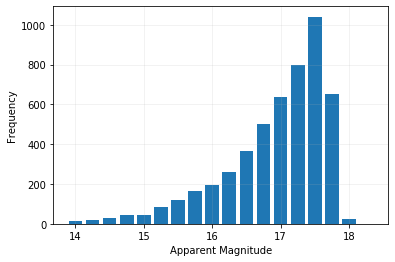

In [37]:
ln = 18
mn = 14
dist = [0 for i in range(ln)]
for i in range(len(label_df)):
    ind = int((label_df['mag'][i]-mn)*4)
    if(ind<ln):
        dist[ind]+=1
fig = plt.figure()
plt.grid(alpha=0.2)
plt.bar([mn+(0.25*i) for i in range(ln)],dist,width=0.2)

# dist = [0 for i in range(42)]
# for i in range(len(label_df)):
#     dist[int(label_df['mag'][i]*10)-140]+=1
# plt.figure()
# plt.grid(alpha=0.2)
# plt.bar([14+(0.1*i) for i in range(42)],dist,width=0.08)

plt.xlabel('Apparent Magnitude')
plt.ylabel('Frequency')
plt.show()
fig.savefig('app_mag.jpg')

In [21]:
print(min(petro_df['petroRad_r']))
print(max(petro_df['petroRad_r']))

1.619551
68.31409000000001


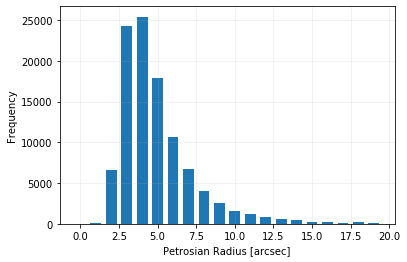

In [38]:
# mx =int(max(petro_df['petroRad_r'])+1)
mx = 20
p_dist = [0 for i in range(mx)]
for i in range(len(petro_df)):
    ind = int(petro_df['petroRad_r'][i])
    if(ind<mx):
        p_dist[ind]+=1
fig = plt.figure()
plt.bar(range(mx),p_dist,width=0.7)
plt.grid(alpha=0.2)
plt.xlabel('Petrosian Radius [arcsec]')
plt.ylabel('Frequency')
plt.show()
fig.savefig('petrorad.jpg')

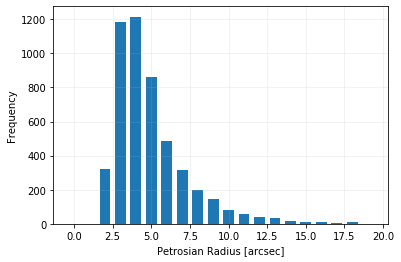

In [39]:
# mx =int(max(petro_df['petroRad_r'])+1)
mx = 20
p_dist = [0 for i in range(mx)]
for i in range(len(label_df)):
    ind = int(label_df['petroRad_r'][i])
    if(ind<mx):
        p_dist[ind]+=1
fig = plt.figure()
plt.bar(range(mx),p_dist,width=0.7)
plt.grid(alpha=0.2)
plt.xlabel('Petrosian Radius [arcsec]')
plt.ylabel('Frequency')
plt.show()
fig.savefig('petrorad.jpg')

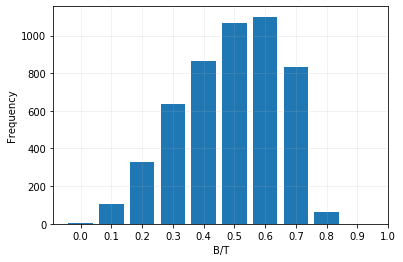

In [23]:
bt_arr = label_df['bt'].values

res = 0.1
num_bins = int(1/res)
dist = [0 for i in range(num_bins)]
for i in range(len(bt_arr)):
    # if(bt_arr[i]==0.65):
        # print(int(data['bt'][i]*num_bins))
    dist[int(bt_arr[i]*num_bins)]+=1
fig = plt.figure()
plt.bar([res*i for i in range(num_bins)],dist,width=res*0.8)
plt.xlabel('B/T')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.xticks([0.1*i for i in range(11)])
plt.show()
fig.savefig('bt.jpg')

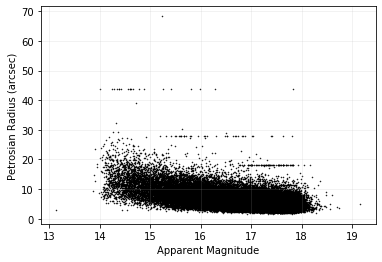

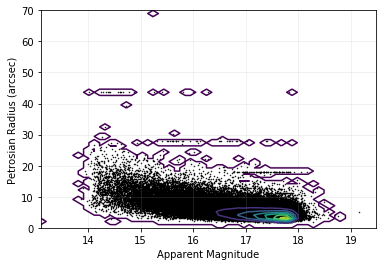

In [0]:
mag_arr = label_df['mag']
rad = label_df['petroRad_r']

plt.scatter(label_df['mag'],label_df['petroRad_r'],marker='.',s=1,color='k')
plt.grid(alpha=0.2)
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius (arcsec)')
plt.show()

xedges = [13.1+i*0.1 for i in range(61)]
yedges = [i for i in range(71)]
z,_,_ = np.histogram2d(label_df['mag'],label_df['petroRad_r'],bins=(xedges,yedges))

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

fig,ax = plt.subplots()
cs = plt.contour(z.T,extent=[13.1,19.1,0,70])

# cs.levels = [nf(val) for val in cs.levels]

# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = '%r %%'

# ax.clabel(cs, cs.levels, inline=False, fmt=fmt, fontsize=10)

plt.scatter(label_df['mag'],label_df['petroRad_r'],marker='.',s=1,color='k')
plt.grid(alpha=0.2)
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius (arcsec)')
plt.show()
fig.savefig('radvsmag.cont.jpg')

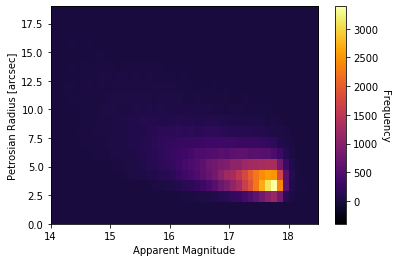

In [195]:
left = 14
right= 45
mag_res = 10
up = 20

def mag_bin(val):
    return int((val-left)*mag_res)

mag_arr = list(label_df['mag'])
rad = list(label_df['petroRad_r'])
mag_func = mag_bin
extent = [left,left+(right/mag_res),0,up-1]
cont_x = [i/mag_res+left for i in range(right)]

freq = [[0 for j in range(right)] for i in range(up)]

for i in range(len(mag_arr)):
    if(int(rad[i])<up and mag_func(mag_arr[i])<right):
        freq[int(rad[i])][mag_func(mag_arr[i])] += 1

fig = plt.figure()
plt.imshow(freq,origin='Lower',extent=extent,aspect='auto',cmap='inferno',vmin=-400)
cbar = plt.colorbar()
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius [arcsec]')
cbar.ax.set_ylabel('Frequency',rotation=270,labelpad=12)
fig.savefig('freq.jpg')
plt.show()

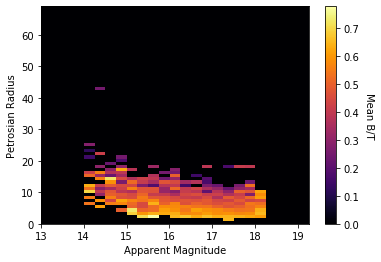

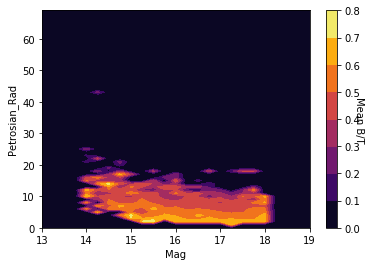

In [168]:
up=70
right=25
mag_arr = label_df['mag']
rad = label_df['petroRad_r']
extent = [13,19.25,0,69]
cont_x = [i/4+13 for i in range(right)]

def mag_func(val):
    return int((val-13)*4)

hist2d = [[0 for j in range(right)] for i in range(up)]
freq = [[0 for j in range(right)] for i in range(up)]

for i in range(len(mag_arr)):
    if(int(rad[i])<up and mag_func(mag_arr[i])<right):
        hist2d[int(rad[i])][mag_func(mag_arr[i])] += label_df['bt'][i]
        freq[int(rad[i])][mag_func(mag_arr[i])] += 1

# fig = plt.figure()
# plt.imshow(freq,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
# cbar = plt.colorbar()
# plt.xlabel('Mag')
# plt.ylabel('Petrosian_rad')
# cbar.ax.set_ylabel('Frequency', rotation=270)
# plt.show()

# fig = plt.figure()
# plt.imshow(hist2d,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
# cbar = plt.colorbar()
# plt.xlabel('Mag')
# plt.ylabel('Petrosian_rad')
# cbar.ax.set_ylabel('Absolute Error', rotation=270)
# plt.show()

for i in range(up):
    for j in range(right):
        if(freq[i][j]!=0):
            hist2d[i][j]/=freq[i][j]
fig = plt.figure()
plt.imshow(hist2d,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
cbar = plt.colorbar()
# plt.contour(hist2d,extent=extent,cmap='Greys_r')
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius')
cbar.ax.set_ylabel('Mean B/T',rotation=270,labelpad=15)
plt.show()
fig.savefig('radvsmagvsbt.jpg')

fig = plt.figure()
plt.contourf(cont_x,range(up),hist2d,cmap='inferno')
cbar = plt.colorbar()
plt.xlabel('Mag')
plt.ylabel('Petrosian_Rad')
cbar.ax.set_ylabel('Mean B/T', rotation=270)
plt.show()


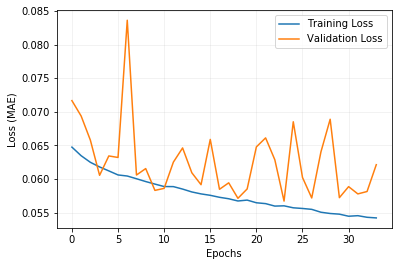

In [57]:
# log = pd.concat([pd.read_csv('./gdrive/My Drive/accnt.2/bt_cnn(gap)cp1.csv'),
#                  pd.read_csv('./gdrive/My Drive/accnt.2/bt_cnn(gap)cp2.csv'),
#                  pd.read_csv('./gdrive/My Drive/accnt.2/bt_cnn(gap)cp3.csv')])
log = pd.read_csv('./gdrive/My Drive/accnt.3/bt_cnn_sb.csv')
log = log.reset_index(drop=True)
fig = plt.figure()
plt.plot(range(len(log)),log['loss'])
plt.plot(range(len(log)),log['val_loss'])
plt.grid(alpha=0.2)
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.show()
fig.savefig('learning_curve.jpg')

In [95]:
print(min(log['val_loss']))

0.05196844336189856


# Inference

In [0]:
ln = len(label_df)

In [0]:
batch_size = 1024

In [146]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=label_df,
                                                  directory=test_folder_path,
                                                  x_col="id",
                                                  class_mode=None,
                                                  target_size=(im_size,im_size),
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 1846 validated image filenames.


In [0]:
# def mask_img(img_arr,shape,mask,mask_p,return_image=False):
#     h,w,_ = shape
#     for j in range((h//2)-mask_p,(h//2)+mask_p):
#         mask[j][(w//2)-mask_p:(w//2)+mask_p] = 1
#     if(return_image):
#         img = image.array_to_img(img_arr*mask)
#     else:
#         img = img_arr*mask
#     return img

In [0]:
# def masked_generator(generator=test_generator,mask1_p=16,mask2_p=32):
#     while(True):
#         X = generator.next()
#         shape = X[0].shape
#         mask = np.zeros_like(X[0])
#         func1 = lambda x:mask_img(x,shape,mask,mask1_p,return_image=False)
#         func2 = lambda x:mask_img(x,shape,mask,mask2_p,return_image=False)
#         X1 = func1(X)
#         X2 = func2(X)
#         yield ([X,X2,X1])

In [0]:
def single_band_generator(generator=test_generator,band='r'):
    dic = {'i':0,'r':1,'g':2}
    while(True):
        X = generator.next()
        shape = X[0].shape
        X = X[:,:,:,dic[band]]
        X = np.expand_dims(X,axis=-1)
        X = np.tile(X,[1,1,1,3])
        yield (X)

In [0]:
# X = next(single_band_generator(test_generator))
# t_ind = random.sample(range(batch_size),8)
# for i in range(len(t_ind)):
#     fig = plt.figure()
#     plt.imshow(X[t_ind[i]])
#     fig.savefig('single_band_'+str(i)+'.jpg')
#     plt.show()

In [0]:
y_test = label_df['bt'].values

In [0]:
def get_pred(model,generator=test_generator):
    pred = model.predict_generator(generator,steps=len(y_test)//batch_size+1)
    pred = pred[:,0]
    return pred

In [0]:
# pred = get_pred(inf_model)
pred1 = get_pred(inf_model1)
pred2 = get_pred(inf_model2)
# pred3 = get_pred(inf_model3)

In [0]:
pred_en = (pred1+pred2)/2
pred = pred1

In [149]:
pred1[0],pred2[0]

(0.57475615, 0.5810099)

In [95]:
pred_en[0]

0.577883

In [70]:
y_test[0]

0.43

In [0]:
df = pd.read_csv('predictions_final(gap).csv')
df_en = pd.read_csv('predictions_ensemble2.csv')
pred = df['Predicted B/T']
y_test = df['Real B/T']
pred_en = df_en['Predicted B/T']

# Main Analysis

In [0]:
def frec_err(y_true,y_pred):
    if(y_true!=0):
        return abs(y_true-y_pred)/(y_true)
    else: 
        return abs(y_true-y_pred)
def squared_err(y_true,y_pred):
    return (y_true-y_pred)**2
def abs_err(y_true,y_pred):
    return abs(y_true-y_pred)

In [206]:
results = [frec_err(y_test[i],pred[i]) for i in range(len(y_test))]
# results2 = [squared_err(y_test[i],pred[i]) for i in range(len(y_test))]
results3 = [abs_err(y_test[i],pred[i]) for i in range(len(y_test))]
results3_en = [abs_err(y_test[i],pred_en[i]) for i in range(len(y_test))]
# print(np.mean(results))
# print(np.mean(results2))
print(np.mean(results3))
print(np.std(results3))
print(np.mean(results3_en))
print(np.std(results3_en))

0.05327353024840354
0.04534087926887793
0.05176786615347862
0.043950978921019616


In [100]:
acc = [1 if results[i]<0.15 else 0 for i in range(len(y_test))]
print(sum(acc)/len(y_test))

0.7681473456121344


In [101]:
acc3 = [1 if results3[i]<0.1 else 0 for i in range(len(results3))]
acc3_en = [1 if results3_en[i]<0.1 else 0 for i in range(len(results3))]
print(sum(acc3)/len(y_test))
print(sum(acc3_en)/len(y_test))

0.8851570964247021
0.9003250270855905


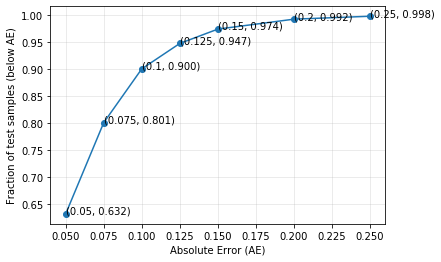

In [103]:
th = [0.05,0.075,0.1,0.125,0.15,0.2,0.25]
acc = []
acc_en = []
for j in range(len(th)):
    # acc3 = [1 if results3[i]<th[j] else 0 for i in range(len(results3))]
    acc3_en = [1 if results3_en[i]<th[j] else 0 for i in range(len(results3))]
    # acc.append(sum(acc3)/len(y_test))
    acc_en.append(sum(acc3_en)/len(y_test))
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.plot(th,acc,marker='o')
# for xy in zip(th, acc):                                       
    # ax.annotate('(%s, %.3f)' % xy, xy=xy, textcoords='data',)
plt.plot(th,acc_en,marker='o')
for xy in zip(th, acc_en):                                       
    ax.annotate('(%s, %.3f)' % xy, xy=xy, textcoords='data')
plt.grid(alpha=0.3)
plt.xlabel('Absolute Error (AE)')
plt.ylabel('Fraction of test samples (below AE)')
plt.show()
fig.savefig('result.jpg')

In [0]:
df = pd.DataFrame([y_test,pred[:len(ls)]]).T
df_en = pd.DataFrame([y_test,pred_en[:len(ls)]]).T
df.columns = ['Real B/T','Predicted B/T']
df_en.columns = ['Real B/T','Predicted B/T']

In [0]:
df.to_csv('predictions.csv',index=None)

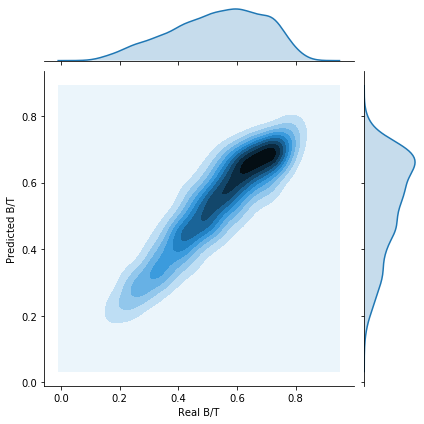

In [0]:
sns.jointplot(x='Real B/T', y='Predicted B/T', data=df, kind="kde")

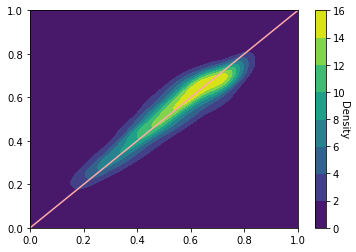

In [0]:
kde = stats.gaussian_kde(df.T)
xx,yy = np.mgrid[0:1.01:.01,0:1.01:.01]
density = kde(np.c_[xx.flat, yy.flat].T).reshape(xx.shape)

f, ax = plt.subplots()
cset = ax.contourf(xx, yy, density)#,cmap="cividis")
plt.plot([i/10. for i in range(11)],[i/10. for i in range(11)],color='#FFAAAA')
cbar = f.colorbar(cset)
cbar.ax.set_ylabel('Density', rotation=270)
plt.show()

In [0]:
# fig = plt.figure(dpi=100)
# ax = fig.add_subplot(1,1,1)
# ax.scatter(y_test,pred[:len(ls)],marker='.',s=4,color='k')
# ax.plot([i/10. for i in range(11)],[i/10. for i in range(11)],'k')
# plt.xlabel('Real B/T')
# plt.ylabel('Predicted')
# plt.grid(alpha=0.2)
# fig.tight_layout()
# plt.show()

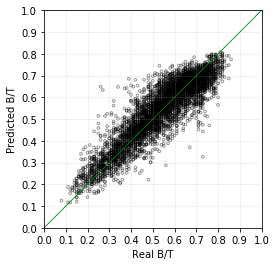

In [52]:
fig = plt.figure()
plt.scatter(y_test,pred_en,marker='o',facecolors='none',s=7,color='k',alpha=0.4)
plt.plot(range(2),range(2),'g',lw=0.8)
plt.xlabel('Real B/T')
plt.ylabel('Predicted B/T')
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal',adjustable='box')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()
fig.savefig('realvspred.jpg')

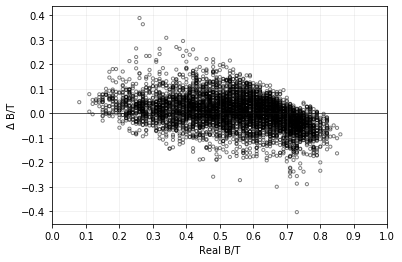

In [57]:
fig = plt.figure()
plt.scatter(y_test,(pred_en-y_test),marker='o',facecolor='none',s=10,color='k',alpha=0.5)
plt.plot(range(2),[0,0],'k',alpha=0.8,lw=0.8)
plt.xlabel('Real B/T')
plt.ylabel('\u0394 B/T')
plt.grid(alpha=0.2)
plt.xticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.show()
fig.savefig('error.jpg')

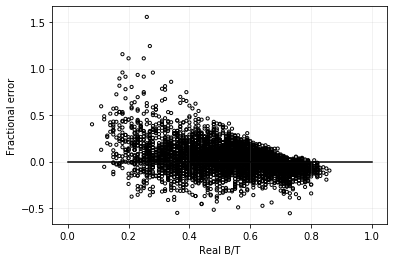

In [55]:
fig = plt.figure()
plt.scatter(y_test,(pred-y_test)/y_test,marker='o',facecolor='none',s=10,color='k')
plt.plot(range(2),[0,0],'k')
plt.xlabel('Real B/T')
plt.ylabel('Fractional error')
plt.grid(alpha=0.2)
plt.show()

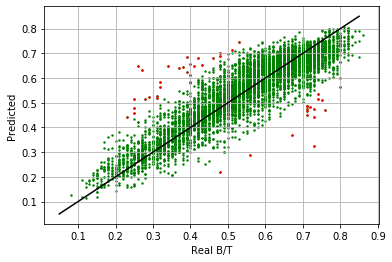

45


In [108]:
plt.figure()
count = 0
lim = 0.2
plt.scatter(y_test,pred_en[:len(ls)],marker='.',s=8,color='g')
for i in range(len(pred)):
    if(results3_en[i]>lim):
        plt.scatter(y_test[i],pred_en[i],color='r',marker='.',s=8)
        count+=1
plt.plot([i/20. for i in range(1,18)],[i/20. for i in range(1,18)],'k')
plt.xlabel('Real B/T')
plt.ylabel('Predicted')
plt.grid()
plt.show()
print(count)

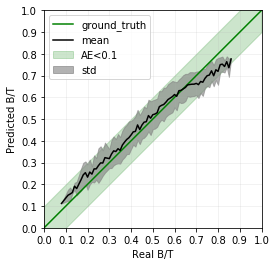

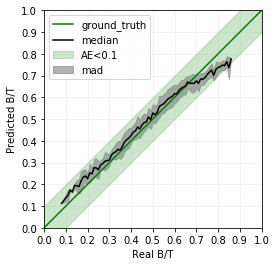

In [11]:
pred_arr = [[] for i in range(100)] 
for i in range(len(pred)):
    pred_arr[int(y_test[i]*100)].append(pred[i])
 
mean = [0 for i in range(len(pred))]
median = [0 for i in range(len(pred))]
std = [0 for i in range(len(pred))]
mad = [0 for i in range(len(pred))]
for i in range(100):
    if(len(pred_arr[i])!=0):
        mean[i] = np.mean(pred_arr[i])
        median[i] = np.median(pred_arr[i])
        std[i] = np.std(pred_arr[i])
        mad[i] = np.median([abs(pred_arr[i][j]-median[i]) for j in range(len(pred_arr[i]))])

plt_mean = np.array([mean[i] for i in range(100) if mean[i]!=0])
plt_median = np.array([median[i] for i in range(100) if mean[i]!=0])
plt_std = np.array([std[i] for i in range(100) if mean[i]!=0])
plt_mad = np.array([mad[i] for i in range(100) if mean[i]!=0])
plt_diff = np.array([abs(i/100.-mean[i]) for i in range(100) if mean[i]!=0])
plt_x = np.array([i/100. for i in range(100) if mean[i]!=0])
# plt.figure()
# plt.plot(range(2),range(2),'g')
# plt.plot(plt_x,plt_mean,'k')
# plt.plot(plt_x,plt_median,'r')
# plt.legend(['ground_truth','mean','median'])
fig = plt.figure()
plt.plot(range(2),range(2),'g')
plt.fill_between(np.arange(2),np.arange(2)-0.1,np.arange(2)+0.1,color='g',alpha=0.2)
# plt.fill_between(np.arange(2),np.arange(2)-0.2,np.arange(2)+0.2,color='g',alpha=0.1)
plt.plot(plt_x,plt_mean,'k')
plt.fill_between(plt_x,plt_mean-plt_std,plt_mean+plt_std,color='gray',alpha=0.6)
plt.legend(['ground_truth','mean','AE<0.1','std'])
# plt.fill_between(plt_x,plt_mean-2*plt_std,plt_mean+2*plt_std,color='gray',alpha=0.3)
plt.gca().set_aspect('equal',adjustable='box')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.ylim((0,1))
plt.grid(alpha=0.2)
plt.xlabel('Real B/T')
plt.ylabel('Predicted B/T')
fig.savefig('mean_std.jpg')
fig = plt.figure()
plt.plot(range(2),range(2),'g')
plt.fill_between(np.arange(2),np.arange(2)-0.1,np.arange(2)+0.1,color='g',alpha=0.2)
# plt.fill_between(np.arange(2),np.arange(2)-0.2,np.arange(2)+0.2,color='g',alpha=0.1)
plt.plot(plt_x,plt_median,'k')
plt.fill_between(plt_x,plt_median-plt_mad,plt_median+plt_mad,color='gray',alpha=0.6)
plt.legend(['ground_truth','median','AE<0.1','mad'])
# plt.fill_between(plt_x,plt_median-2*plt_mad,plt_median+2*plt_mad,color='gray',alpha=0.3)
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal',adjustable='box')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Real B/T')
plt.ylabel('Predicted B/T')
fig.savefig('median_mad.jpg')
# plt.figure()
# plt.plot(plt_x,plt_diff)
plt.show()

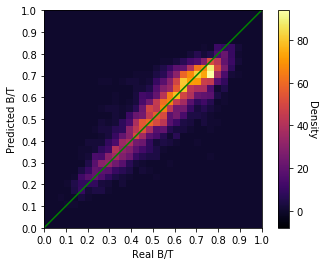

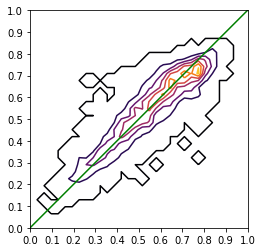

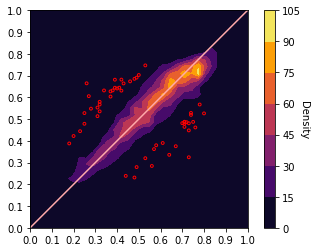

54


In [26]:
eps = 0.03
ln = int(1/eps)
xedges = [eps*i for i in range(ln)]
yedges = [eps*i for i in range(ln)]

H,xedges,yedges = np.histogram2d(df['Real B/T'],df_en['Predicted B/T'],bins=(xedges,yedges))
H=H.T
fig = plt.figure()
plt.imshow(H, interpolation='nearest', origin='low',extent=[0,1,0,1],cmap='inferno',vmin=-8)
cbar = plt.colorbar()
plt.plot(range(2),range(2),'g')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlabel('Real B/T')
plt.ylabel('Predicted B/T')
cbar.ax.set_ylabel('Density',rotation=270,labelpad=8)
fig.savefig('binned_realvspred.jpg')
plt.figure()
plt.contour(H,extent=[0,1,0,1],cmap='inferno')
plt.plot(range(2),range(2),color='g')
# plt.scatter(y_test,pred[:len(ls)],marker='o',facecolor='none',s=6,color='k')
plt.gca().set_aspect('equal',adjustable='box')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.ylim((0,1))
fig = plt.figure()
plt.contourf(H,extent=[0,1,0,1],cmap='inferno')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density',rotation=270,labelpad=8)
plt.plot(range(ln-1),range(ln-1),color='#FFAAAA')
count = 0
lim = 0.2
for i in range(len(pred)):
    if(results3[i]>lim):
        plt.scatter(y_test[i],pred[i],color='r',marker='o',s=8,facecolor='none')
        count+=1
plt.gca().set_aspect('equal',adjustable='box')
plt.xticks([0.1*i for i in range(11)])
plt.yticks([0.1*i for i in range(11)])
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()
print(count)

0.03


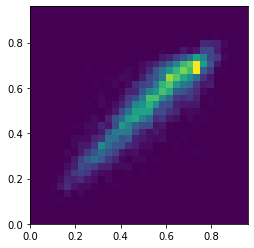

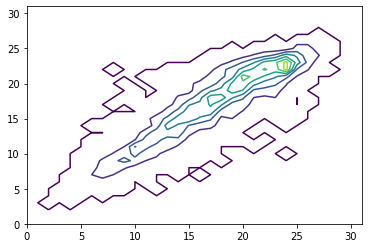

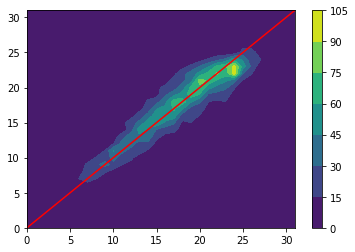

0.04


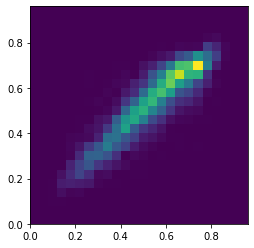

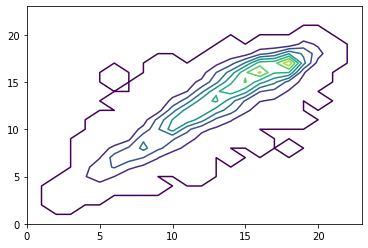

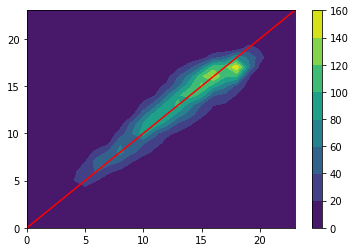

0.05


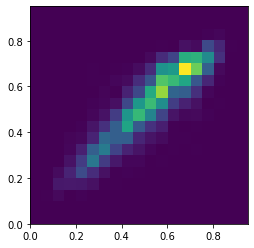

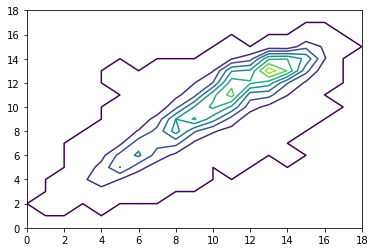

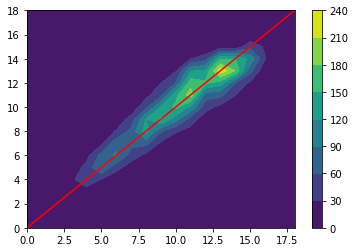

0.06


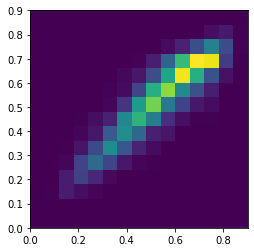

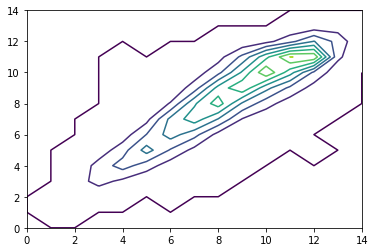

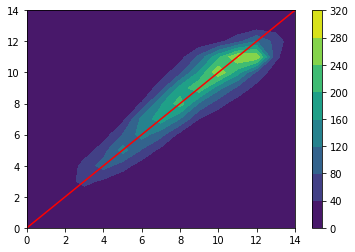

0.07


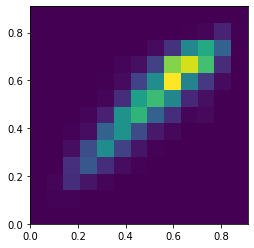

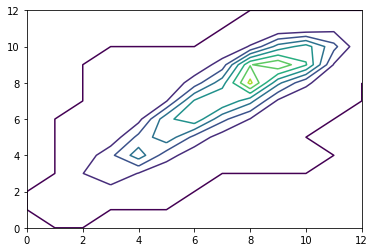

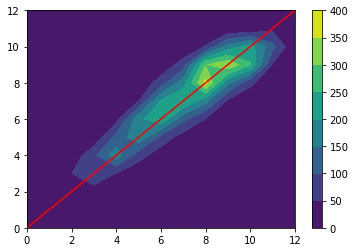

In [92]:
for i in range(3,8):
    xedges = [(i/100)*j for j in range(100//i)]
    yedges = [(i/100)*j for j in range(100//i)]
    H,xedges,yedges = np.histogram2d(df['Real B/T'],df['Predicted B/T'],bins=(xedges,yedges))
    H=H.T
    plt.figure()
    plt.imshow(H, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.figure()
    plt.contour(H)
    plt.figure()
    plt.contourf(H)
    plt.colorbar()
    plt.plot([j for j in range(100//i-1)],[j for j in range(100//i-1)],'r')
    print(i/100)
    plt.show()

In [0]:
# inp_batch = next(masked_generator())
# ind = np.random.randint(1024)
# inp_single = [inp_batch[i][ind].reshape(1,128,128,3) for i in range(3)]
# plt.imshow(inp_single[0][0])
# plt.show()

In [0]:
# conc_image = inp_mod.predict(inp_single)
# norm = lambda x:(conc_image[0,:,:,x]-np.min(conc_image[0,:,:,x]))/(np.max(conc_image[0,:,:,x])-np.min(conc_image[0,:,:,x]))
# conc_image[0,:,:,0] = norm(0)
# conc_image[0,:,:,1] = norm(1)
# conc_image[0,:,:,2] = norm(2)
# plt.imshow(conc_image[0])
# plt.show()
# pred_single = inf_model.predict(inp_single)
# print(pred_single[0])

In [0]:
# for i in range(len(ls)):
#     if(results3[i]>0.1):
#         im_path = test_folder_path+'/'+ls[i]+'.jpg'
#         test_img = image.load_img(im_path,target_size=(64,64),color_mode='rgb')
#         plt.figure()
#         plt.imshow(test_img)
#         txt = 'Real B/T: ',y_test[i],'  Predicted B/T: ',pred[i][0],' MAE: ',results3[i][0]
#         # plt.xlabel(txt)
#         plt.show()
#         print(txt)
#         print('\n')

17.48


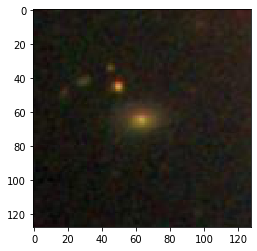

real_0.34_pred_0.648267388343811_ae_0.308267388343811
./img/95525_RA_169.658_DEC_42.3092_Rad_29.16_rTot_2.01_C_3.08_BT_0.34.jpg


15.331


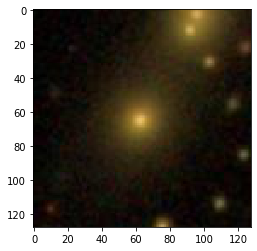

real_0.27_pred_0.6335932016372681_ae_0.36359320163726805
./img/96363_RA_231.035_DEC_29.8821_Rad_26.06_rTot_20.52_C_3.67_BT_0.27.jpg


15.964


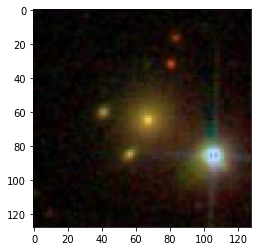

real_0.26_pred_0.6489626169204712_ae_0.3889626169204712
./img/97458_RA_208.768_DEC_8.60026_Rad_33.27_rTot_10.15_C_3.59_BT_0.26.jpg


17.718


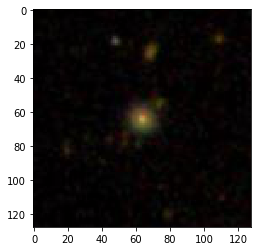

real_0.73_pred_0.3267056941986084_ae_0.4032943058013916
./img/9941_RA_62.8332_DEC_-6.04727_Rad_16.13_rTot_1.78_C_2.67_BT_0.73.jpg


4


In [31]:
ctr = 0
for i in range(len(pred)):
    if(results3_en[i]>0.3):
        ctr+=1
        im_path = test_folder_path+'/'+ls[i]+'.jpg'
        test_img = image.load_img(im_path,target_size=(128,128),color_mode='rgb')
        print(data['mag'][id(ls[i])])
        fig = plt.figure()
        plt.imshow(test_img)
        txt = 'real_'+str(y_test[i])+'_pred_'+str(pred_en[i])+'_ae_'+str(results3_en[i])
        # plt.xlabel(txt)
        plt.show()
        # fig.savefig(txt+'.jpg',bbox_inches='tight')
        print(txt)
        print(im_path)
        print('\n')
print(ctr)

In [0]:
ctr = 0
for i in range(len(ls)):
    if(results3[i]<0.01):
        ctr+=1
        im_path = test_folder_path+'/'+ls[i]+'.jpg'
        test_img = image.load_img(im_path,target_size=(64,64),color_mode='rgb')
        plt.figure()
        plt.imshow(test_img)
        txt = 'Real B/T: ',y_test[i],'  Predicted B/T: ',pred[i]
        # plt.xlabel(txt)
        plt.show()
        print(txt)
        print('\n')
print(ctr)

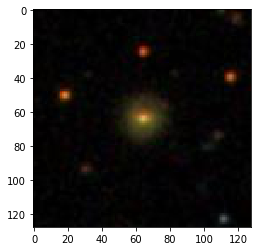

real_0.42_pred_0.3766043484210968_ae_0.04339565157890318
./img/95852_RA_138.389_DEC_29.2253_Rad_19.21_rTot_2.05_C_2.78_BT_0.42.jpg




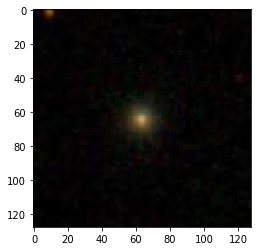

real_0.77_pred_0.694542646408081_ae_0.07545735359191896
./img/95853_RA_139.308_DEC_29.5913_Rad_14.71_rTot_2.07_C_3.03_BT_0.77.jpg




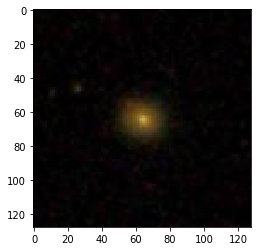

real_0.26_pred_0.28614342212677_ae_0.02614342212677001
./img/95854_RA_140.44_DEC_30.0382_Rad_26.81_rTot_2.32_C_2.72_BT_0.26.jpg




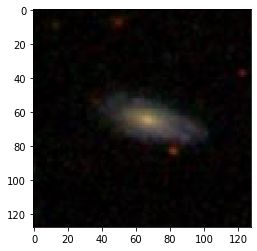

real_0.35_pred_0.30439507961273193_ae_0.045604920387268044
./img/95855_RA_141.629_DEC_30.485_Rad_15.58_rTot_3.23_C_2.83_BT_0.35.jpg




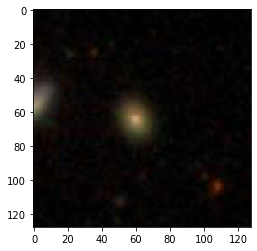

real_0.36_pred_0.4012507796287537_ae_0.04125077962875373
./img/95856_RA_142.001_DEC_30.7593_Rad_7.45_rTot_1.8_C_2.53_BT_0.36.jpg




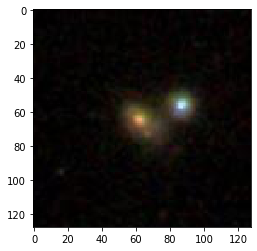

real_0.6_pred_0.5670075416564941_ae_0.03299245834350584
./img/95857_RA_143.69_DEC_31.3163_Rad_23.28_rTot_2.1_C_2.53_BT_0.6.jpg




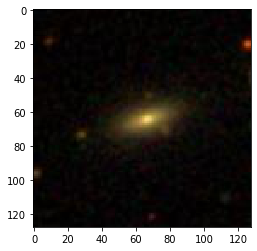

real_0.81_pred_0.7975192070007324_ae_0.012480792999267631
./img/95858_RA_143.761_DEC_31.4326_Rad_20.31_rTot_1.64_C_2.45_BT_0.81.jpg




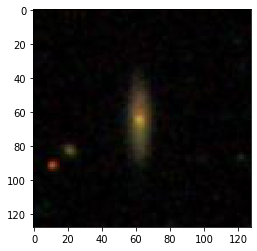

real_0.19_pred_0.2513802051544189_ae_0.06138020515441889
./img/95859_RA_143.764_DEC_31.548_Rad_45.98_rTot_2.26_C_3.05_BT_0.19.jpg




In [19]:
for i in range(389,397):
    im_path = test_folder_path+'/'+ls[i]+'.jpg'
    test_img = image.load_img(im_path,target_size=(128,128),color_mode='rgb')
    fig = plt.figure()
    plt.imshow(test_img)
    txt = 'real_'+str(y_test[i])+'_pred_'+str(pred_en[i])+'_ae_'+str(results3_en[i])
    # plt.xlabel(txt)
    plt.show()
    fig.savefig(txt+'.jpg',bbox_inches='tight')
    print(txt)
    print(im_path)
    print('\n')

# Tertiary Analysis

In [0]:
mag = list(label_df['mag'])
z = np.array([data['z'][id(label_df['id'][i])] for i in range(len(label_df))])
psc = z*4.22e9
abs_mag = label_df['mag']-2.5*np.log(np.square(psc/10))
rad = list(label_df['petroRad_r'])

In [0]:
df = pd.DataFrame([mag,rad]).T
df.columns = ['Mag','Petrosian_Rad']

In [0]:
def plot_param(arr):
    plt.figure()
    plt.grid(alpha=0.2)
    plt.scatter(range(len(arr)),arr,marker='.',s=2,color='k')
    plt.show()

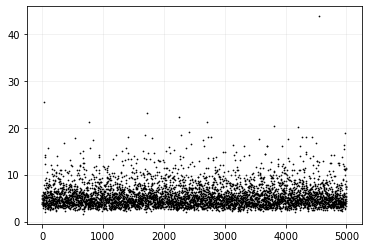

In [35]:
plot_param(rad)

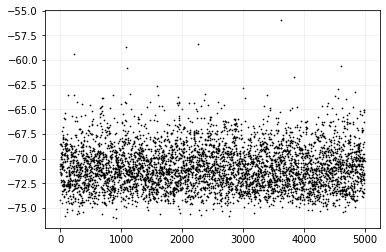

In [0]:
plot_param(abs_mag)

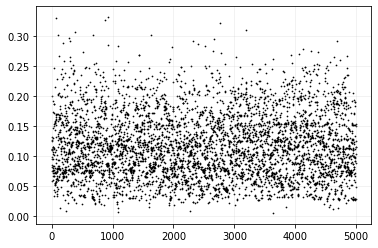

In [0]:
plot_param(z)

In [0]:
print(max(rad))
print(min(rad))
print(max(mag))
print(min(mag))

43.78009
1.619551
18.17799949645996
14.062000274658203


In [0]:
# x_eps = 0.5 
# ln_x = int((18.5-13.5)/x_eps)
# xedges = [13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5]
# yedges = [i for i in range(21)]

In [0]:
def mag_bin(val):
    return int((val-13.75)*4)

In [0]:
def abs_mag_bin(val):
    return int((val+77.5)/2.5)

In [0]:
def get_hist2d(rad,mag_type='abs',up=25,right=10,plot=True,contour=True):
    
    if(mag_type=='abs'):
        right=10
        mag_arr = abs_mag
        mag_func = abs_mag_bin
        extent = [-77.5,-55,0,24]
        cont_x = [i*2.5-77.5 for i in range(right)]
    if(mag_type=='app'):
        right=19
        mag_arr = mag
        mag_func = mag_bin
        extent = [13.75,18,0,24]
        cont_x = [i/4+13.75 for i in range(right)]
    
    hist2d = [[0 for j in range(right)] for i in range(up)]
    freq = [[0 for j in range(right)] for i in range(up)]

    for i in range(len(mag_arr)):
        if(int(rad[i])<up and mag_func(mag_arr[i])<right):
            hist2d[int(rad[i])][mag_func(mag_arr[i])] += results3[i]
            freq[int(rad[i])][mag_func(mag_arr[i])] += 1

    if(plot):
        fig = plt.figure()
        plt.imshow(freq,origin='Lower',extent=extent,aspect='auto',cmap='inferno',vmin=-50)
        cbar = plt.colorbar()
        plt.xlabel('Apparent Magnitude')
        plt.ylabel('Petrosian Radius [arcsec]')
        cbar.ax.set_ylabel('Frequency',rotation=270,labelpad=12)
        fig.savefig('freq.jpg')
        plt.show()

        fig = plt.figure()
        plt.imshow(hist2d,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
        cbar = plt.colorbar()
        plt.xlabel('Mag')
        plt.ylabel('Petrosian Radius')
        cbar.ax.set_ylabel('Absolute Error', rotation=270)
        plt.show()

        for i in range(up):
            for j in range(right):
                if(freq[i][j]!=0):
                    hist2d[i][j]/=freq[i][j]
        fig = plt.figure()
        plt.imshow(hist2d,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
        cbar = plt.colorbar()
        plt.xlabel('Apparent Magnitude')
        plt.ylabel('Petrosian Radius [arcsec]')
        cbar.ax.set_ylabel('Mean Absolute Error',rotation=270,labelpad=12)
        plt.show()
        fig.savefig('magradae.jpg')
    
    if(contour):
        fig = plt.figure()
        plt.contourf(cont_x,range(up),hist2d,cmap='inferno')
        cbar = plt.colorbar()
        plt.xlabel('Mag')
        plt.ylabel('Petrosian_Rad')
        cbar.ax.set_ylabel('Mean Absolute Error', rotation=270)
        plt.show()

    return hist2d,freq

In [0]:
hist2d,freq = get_hist2d(rad)

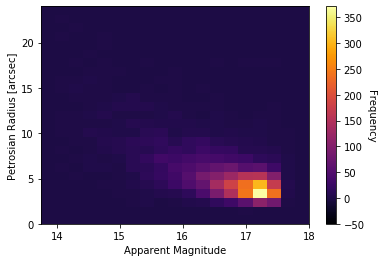

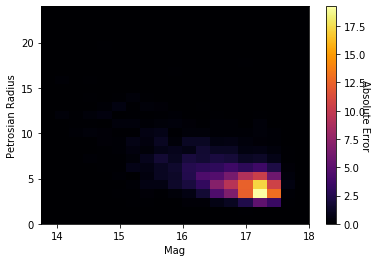

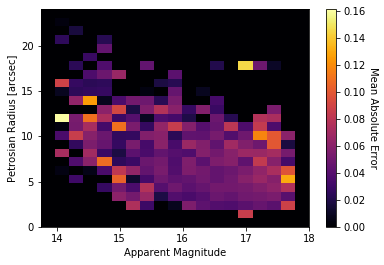

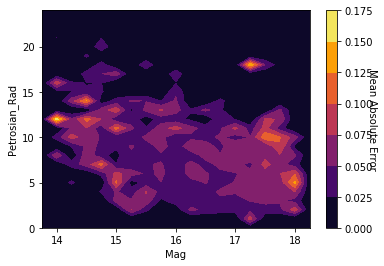

In [165]:
hist2d,freq = get_hist2d(rad,mag_type='app')

In [210]:
left = 14
right= 45
mag_res = 10
up = 20

def mag_bin(val):
    return int((val-left)*mag_res)

mag_func = mag_bin
extent = [left,left+(right/mag_res),0,up-1]
cont_x = [i/mag_res+left for i in range(right)]  

hist2d = [[0 for j in range(right)] for i in range(up)]
freq = [[0 for j in range(right)] for i in range(up)]

for i in range(len(mag_arr)):
    if(int(rad[i])<up and mag_func(mag_arr[i])<right):
        hist2d[int(rad[i])][mag_func(mag_arr[i])] += results3[i]
        freq[int(rad[i])][mag_func(mag_arr[i])] += 1

fig = plt.figure()
plt.imshow(freq,origin='Lower',extent=extent,aspect='auto',cmap='inferno',vmin=-50)
cbar = plt.colorbar()
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius [arcsec]')
cbar.ax.set_ylabel('Frequency',rotation=270,labelpad=12)
fig.savefig('freq.jpg')
plt.show()

for i in range(up):
    for j in range(right):
        if(freq[i][j]!=0):
            hist2d[i][j]/=freq[i][j]
fig = plt.figure()
plt.imshow(hist2d,origin='Lower',extent=extent,aspect='auto',cmap='inferno')
cbar = plt.colorbar()
plt.xlabel('Apparent Magnitude')
plt.ylabel('Petrosian Radius [arcsec]')
cbar.ax.set_ylabel('Mean Absolute Error',rotation=270,labelpad=12)
plt.show()
fig.savefig('magradae.jpg')

IndexError: ignored

In [0]:
# hist2d,freq = get_hist2d(rad,mag_type='app',plot=False,contour=False)

# for i in range(25):
#     for j in range(19):
#         if(freq[i][j]!=0):
#             hist2d[i][j]/=freq[i][j]

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# im = ax.imshow(hist2d,origin='lower',aspect='auto')

# ax.set_xticks(np.arange(19))
# ax.set_yticks(np.arange(25))
# for i in range(25):
#     for j in range(19):
#         text = ax.text(j, i, hist2d[i][j],
#                        ha="center", va="center", color="w")
# plt.show()

# Other Analysis

In [0]:
df['Predicted B/T']=df['Predicted B/T'].transform(lambda x:round(x,3))

In [0]:
# X, Y = np.meshgrid(df['Real B/T'],df['Predicted B/T'])
for i in range(5,60,5):
    H,xedges,yedges = np.histogram2d(df['Real B/T'],df['Predicted B/T'],bins=i)
    H=H.T
    plt.figure()
    plt.imshow(H, interpolation=None, origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.figure()
    plt.contour(H)
    plt.figure()
    plt.contourf(H)
    plt.colorbar()
    plt.plot([j for j in range(i)],[j for j in range(i)],'r')
    print(i)
    plt.show()

In [0]:
# levels = np.arange(0, 20, 1)


In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, title='pcolormesh: actual edges',aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

In [0]:
np.arange(0, 20, 1)

In [0]:
pred_dist = [0 for i in range(10)]
ctr = [0 for i in range(10)]
for i in range(len(y_test)):
    ind = int(y_test[i]*10)
    ctr[ind]+=1
    pred_dist[ind]+=frec_err(y_test[i],pred[i])
pred_dist = [0]+[pred_dist[i]/ctr[i] for i in range(1,9)]+[0]
print(pred_dist)

In [0]:
pred_dist2 = np.array([0]+[pred_dist[i][0]*ctr[i] for i in range(1,9)]+[0])
print(pred_dist2)

In [0]:
plt.plot([i/10. for i in range(10)],pred_dist)
plt.show()

In [0]:
plt.plot([i/10. for i in range(10)],ctr)
plt.plot([i/10. for i in range(10)],pred_dist2)
plt.show()

In [0]:
plt.plot([i/10. for i in range(10)],pred_dist2/sum(pred_dist2))
plt.show()

In [0]:
# n = len(y_test)
for i in range(300,320):
    if i not in rem_ind:
        im_path = test_folder_path+'/'+ls[i]+'.jpg'
        test_img = image.load_img(im_path,target_size=(64,64),color_mode='rgb')
        plt.figure()
        plt.imshow(test_img)
        txt = 'Real B/T: ',y_test[i],'  Predicted B/T: ',pred[i][0]
        # plt.xlabel(txt)
        plt.show()
        print(txt)
        print('\n')

In [0]:
plt.figure()
plt.scatter(y_test,pred)
plt.plot([i/10. for i in range(10)],[i/10. for i in range(10)],'k')
plt.xlabel('Real B/T')
plt.ylabel('Predicted')
plt.grid()
plt.show()

In [0]:
plt.figure()
plt.scatter(y_test,pred)
plt.plot([i/10. for i in range(11)],[i/10. for i in range(11)],'k')
plt.plot([i/10. for i in range(11)],[0]+pred_dist[1:],'g')
plt.plot([i/10. for i in range(11)],pred_dist2/sum(pred_dist2),'c')
plt.plot([i/10. for i in range(11)],np.array(ctr)/sum(ctr),'r')
plt.xlabel('Real B/T')
# plt.ylabel('Predicted')
plt.grid()
plt.legend(['Real','Mean Fractional Error','Total Fractional Error','Distribution'])
plt.show()